# Requirements

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **mean temperature** in the city of Delhi. To accomplish this use data from the past three days, which includes information such as the **mean temperature**, **humidity**, **wind speed**, and **mean pressure**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future mean temperature based on the provided historical data.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [70]:
original = pd.read_csv('climate-data.csv')
data = original.copy()
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


Explore the dataset using visualizations of your choice.

In [71]:
data["date"] = pd.to_datetime(data["date"])
data.set_index(keys=["date"], inplace=True)
data.sort_index(inplace=True)
data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


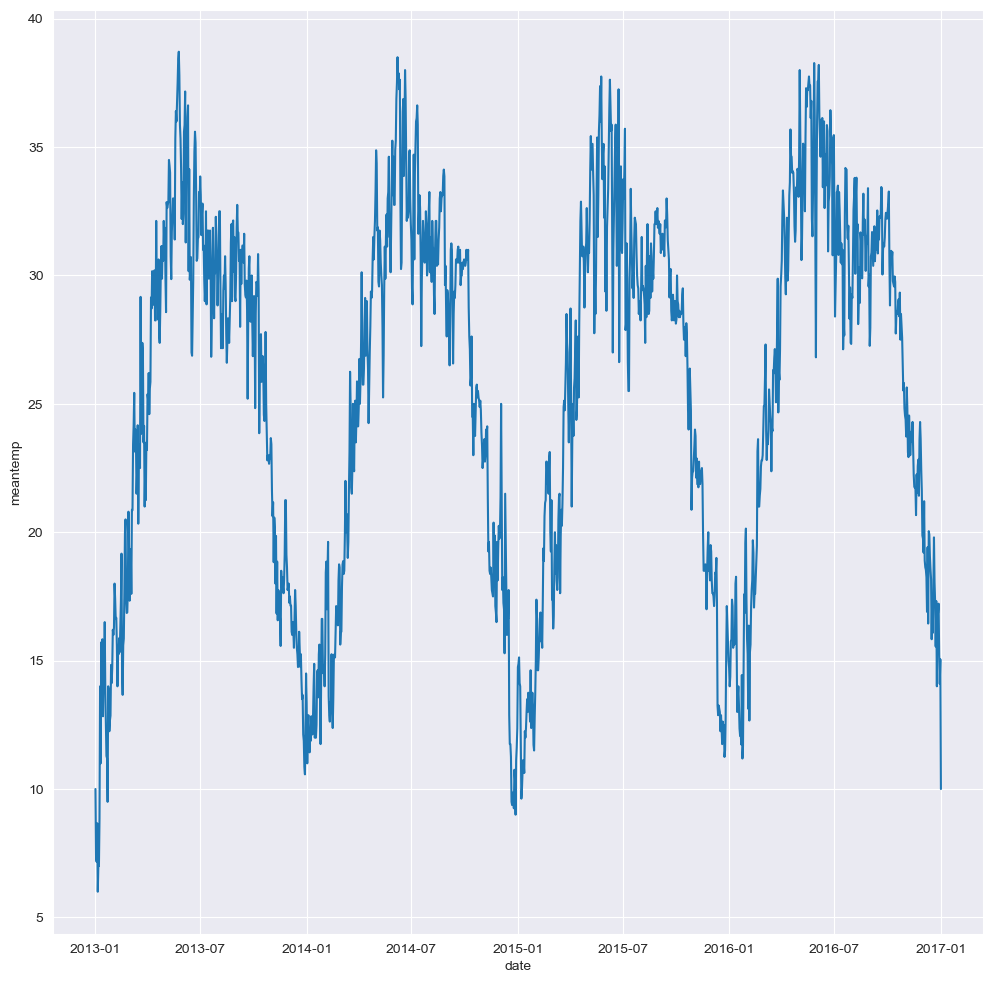

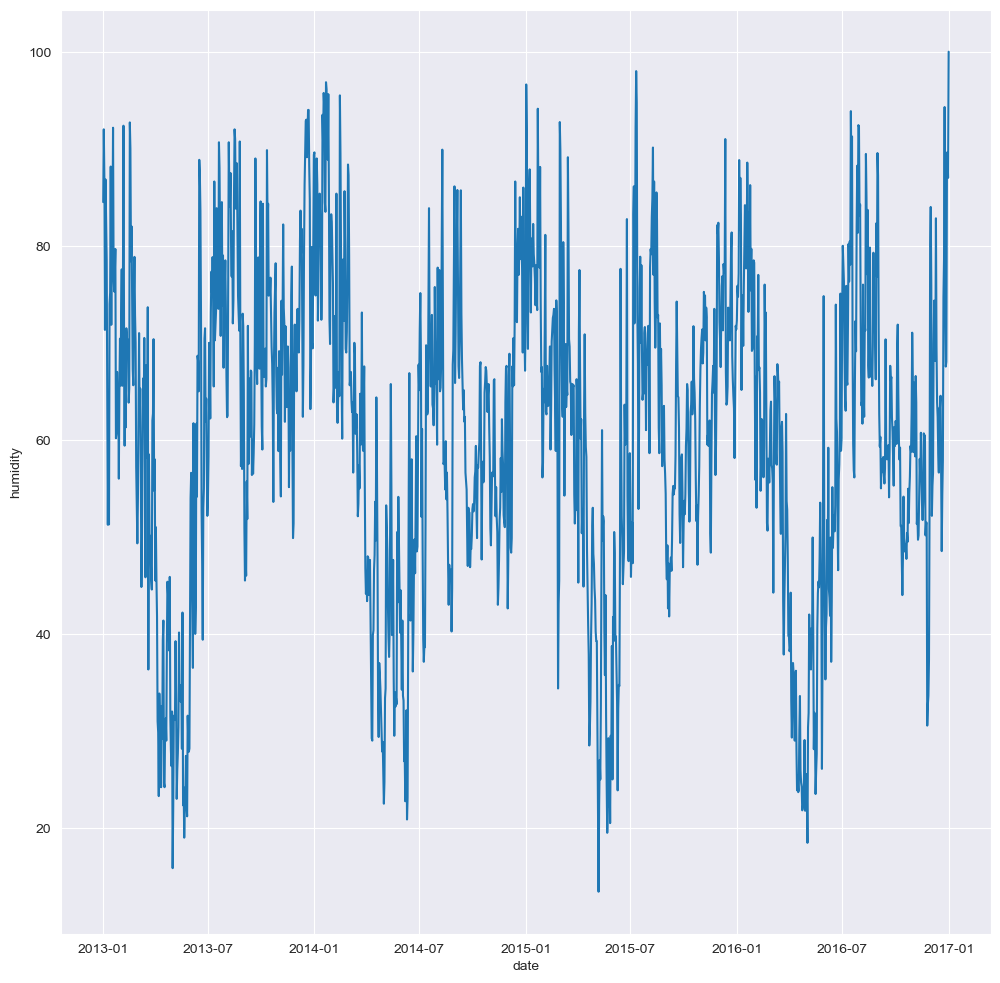

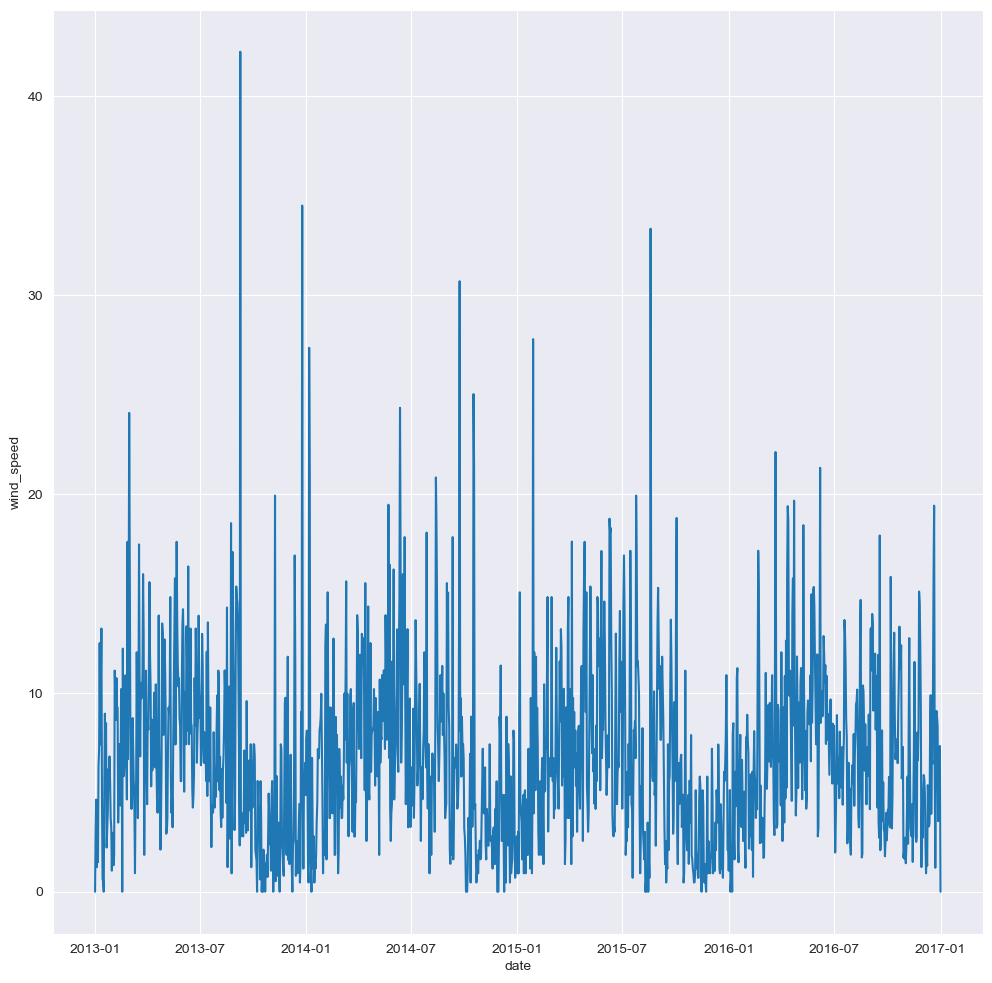

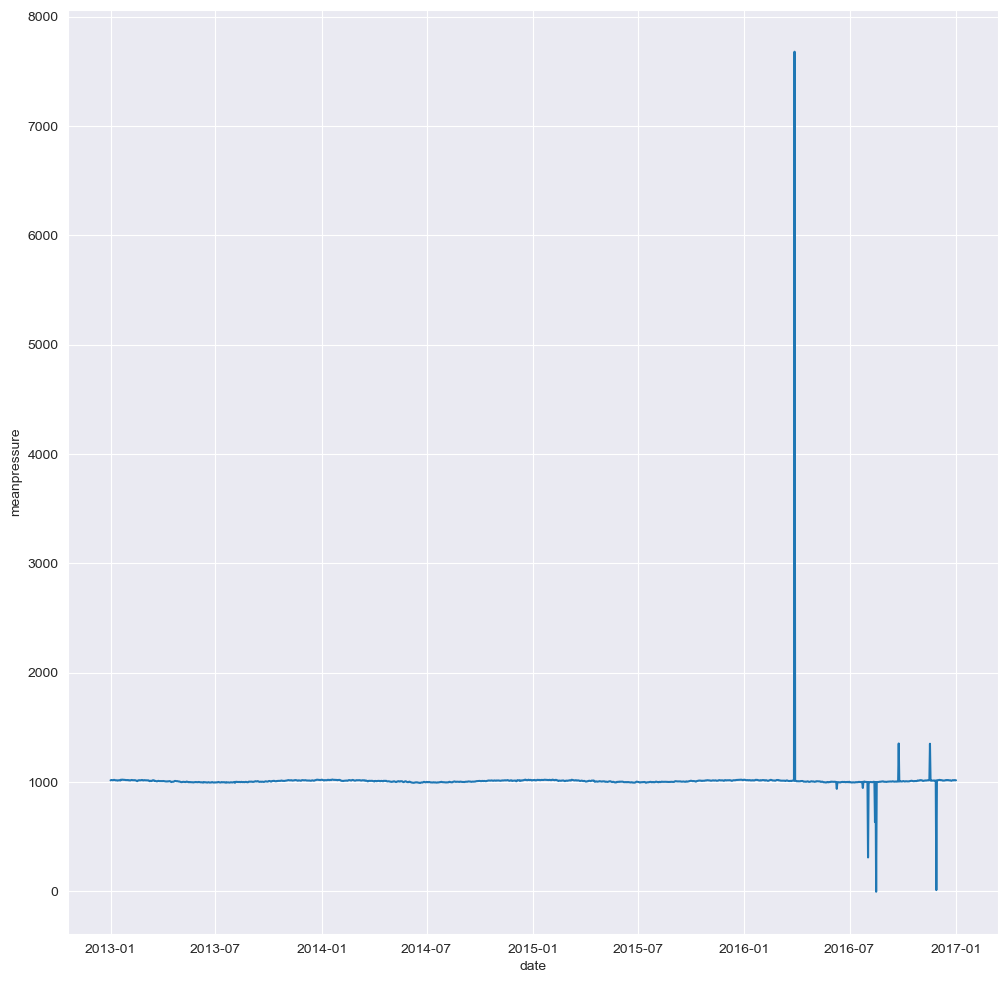

In [72]:
features = ["meantemp", "humidity", "wind_speed", "meanpressure"]
for feature in features:
    plt.figure(figsize=(12,12))
    sns.lineplot(data[feature])
    plt.show()

<Axes: >

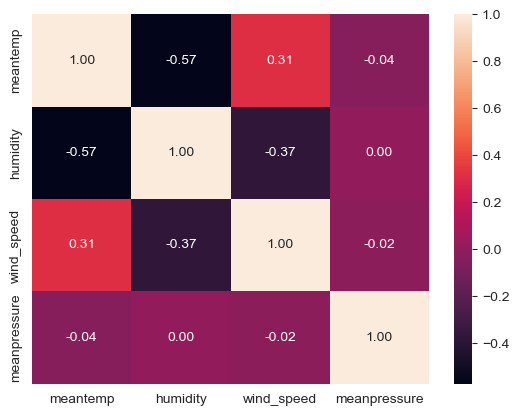

In [73]:
sns.heatmap(data.corr(), annot=True, fmt=".2f")
#sns.pairplot(data)

## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [74]:
data.isnull().sum() / len(data) * 100

meantemp        0.0
humidity        0.0
wind_speed      0.0
meanpressure    0.0
dtype: float64

In [75]:
features

['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [76]:
for lag in range(3, 0, -1):
    for column in features:
        data[f"{column}_{lag}"] = data[column].shift(lag)
data

,meantemp,humidity,wind_speed,meanpressure,meantemp_3,humidity_3,wind_speed_3,meanpressure_3,meantemp_2,humidity_2,wind_speed_2,meanpressure_2,meantemp_1,humidity_1,wind_speed_1,meanpressure_1
date,,,,,,,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000
2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
2016-12-30,14.095238,89.666667,6.266667,1017.904762,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762


In [77]:
features = ["humidity", "wind_speed", "meanpressure"]
data.drop(columns=features, inplace=True)
data.dropna(axis=0, inplace=True)
data

,meantemp,meantemp_3,humidity_3,wind_speed_3,meanpressure_3,meantemp_2,humidity_2,wind_speed_2,meanpressure_2,meantemp_1,humidity_1,wind_speed_1,meanpressure_1
date,,,,,,,,,,,,,
2013-01-04,8.666667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
2013-01-05,6.000000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
2013-01-06,7.000000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
2013-01-07,7.000000,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
2013-01-08,8.857143,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
2016-12-29,15.238095,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
2016-12-30,14.095238,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762


## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [78]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['meantemp'])
Y = data['meantemp']

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.1, shuffle=False)

## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [80]:
train_X.shape[1]

12

In [81]:
lag = 3
(train_X.shape[0], lag, train_X.shape[1] // lag ) 

(1313, 3, 4)

In [82]:
train_X = train_X.reshape((train_X.shape[0], lag, (train_X.shape[1] // lag)))
test_X = test_X.reshape((test_X.shape[0], lag, (test_X.shape[1] // lag)))

In [83]:
train_X.shape

(1313, 3, 4)

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the current **mean temperature** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [84]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [85]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [86]:
history = model.fit(train_X, train_y, validation_split=0.20, epochs=16, batch_size=64, shuffle=False)

Epoch 1/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.3475 - mean_squared_error: 0.3475 - val_loss: 0.3256 - val_mean_squared_error: 0.3256
Epoch 2/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2411 - mean_squared_error: 0.2411 - val_loss: 0.1815 - val_mean_squared_error: 0.1815
Epoch 3/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 4/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 5/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 6/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 7/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0098 - va

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

<Axes: >

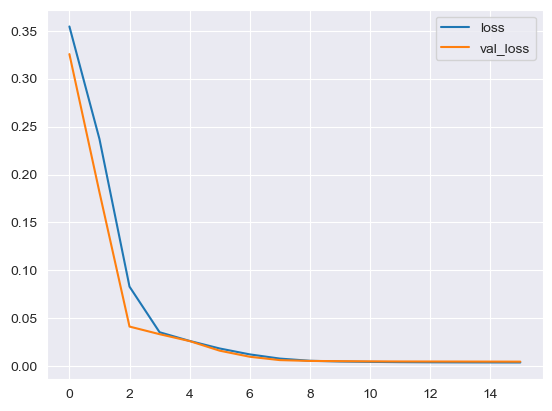

In [87]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

Use the trained model to make predictions for the test set.

In [88]:
pred_y = model.predict(test_X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pred_y = scaler.inverse_transform(pred_y)
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(1.1826006375760316, 2.3046286309908095, 0.9292254287754405)

Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

<Axes: xlabel='date'>

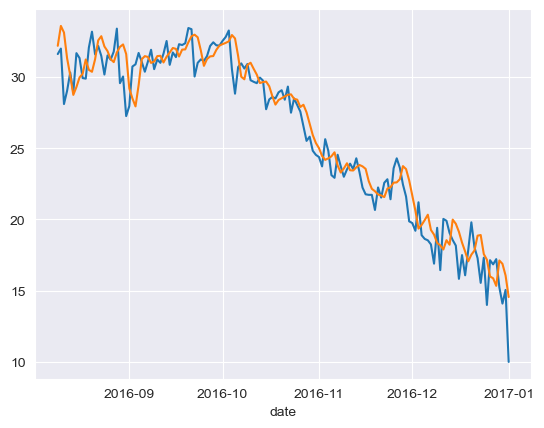

In [93]:
sns.lineplot(x=test_y.index, y=test_y.values)
sns.lineplot(x=test_y.index, y=pred_y.flatten())

# Laboratory Exercise - Bonus Task (+ 2 points)

As a bonus task for this laboratory exercise, calculate the Simple Moving Average (SMA) and Weighted Moving Average (WMA) with 3 timesteps for `mean_temperature` over the past 1, 2, and 3 days:

- **SMA with 3 timesteps ($\text{SMA}_3$)** - the average of temperatures from the previous 3 days:  
  $SMA_3 = \frac{\text{mean\_temperaure}_{lag\_3} +\ \text{mean\_temperaure}_{lag\_2} +\ \text{mean\_temperaure}_{lag\_1}}{1\ +\ 1\ +\ 1}$.

- **WMA with 3 timesteps ($\text{WMA}_3$)** - a weighted average, giving more importance to recent days:  
  $WMA_3 = \frac{1\ \cdot\ \text{mean\_temperaure}_{lag\_3} +\ 2\ \cdot\ \text{mean\_temperaure}_{lag\_2} +\ 3\ \cdot\ \text{mean\_temperaure}_{lag_1}}{1\ +\ 2\ +\ 3}$.

Then use this indicators alongside the other features in the dataset to predict the `mean_temperaure`.

*Hint: Use the `rolling` method from `pandas`. Check the docs at the following link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html.*

In [98]:
# Write your code here. Add as many boxes as you need.
data['SMA_3'] = data['meantemp'].rolling(window=3).mean()

In [97]:
def weighted_moving_average(series):
    weights = [1, 2, 3]
    return (series * weights).sum() / sum(weights)
data['WMA_3'] = data['meantemp'].rolling(window=3).apply(weighted_moving_average, raw=False)

In [99]:
data

,meantemp,meantemp_3,humidity_3,wind_speed_3,meanpressure_3,meantemp_2,humidity_2,wind_speed_2,meanpressure_2,meantemp_1,humidity_1,wind_speed_1,meanpressure_1,SMA_3,WMA_3
date,,,,,,,,,,,,,,,
2013-01-04,8.666667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,NaN,NaN
2013-01-05,6.000000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,NaN,NaN
2013-01-06,7.000000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.222222,6.944444
2013-01-07,7.000000,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,6.666667,6.833333
2013-01-08,8.857143,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000,7.619048,7.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.070083,17.082505
2016-12-29,15.238095,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,16.435162,16.166511
2016-12-30,14.095238,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,15.516908,14.996549
